# Workshop Automatants @ CentraleSupélec - CeSIA

- Création : 02/2025 par [Nicolas Guillard](mailto:nicolas.guillar@securite-ia.fr) - bénévole au [CeSIA](https://www.securite-ia.fr/).

Créer en adaptant et complétant le projet [Générer des noms de villes et communes françaises](https://github.com/alxndrTL/villes) par [Alexandre TL](https://www.youtube.com/@alexandretl)


## Présentation du sujet et Plan

## Indications de travail

Les éléments de ce TP :
- le présent carnet
- le répertoire `utils` et les fichiers contenus
- le fichier de données
- le répertoire weights contenant les poids des modèles

## Les modules et paramétrages globaux

Tous les modules nécessaires sont importés. A moins d'un besoin spécifique, il n'y aura pas besoin de modifier le bloc de code suivant.

In [ ]:
# Modules prédéfinis et tiers
import math
import datetime
from dataclasses import dataclass
from collections import Counter
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import torch

In [2]:
#Modules créés pour le projet 
from utils import freq_distribution, freq_char, rate_freq_by_position, freq_composition_element, composition_distribution
from utils import CityNameDataset, SOS, EOS, PAD

### Paramétrages

In [3]:
# Retirer la limite du nombre maximal de lignes affichées dans un tableau pandas
pd.set_option('display.max_rows', None) 

In [4]:
# Configurer le thème de seaborn
sns.set_theme(style="whitegrid")

## Exploration des données

In [5]:
df = pd.read_table("./villes.txt", header=None, names=["nom"])
display(df.head(20))

,nom
0,arbignieu
1,mouilleron
2,tsingoni
3,upaix
4,margès
5,reutenbourg
6,prades-salars
7,rouffignac-de-sigoulès
8,andelarre
9,montrouveau


Affichons les premières informations structurelles :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36583 entries, 0 to 36582
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nom     36583 non-null  object
dtypes: object(1)
memory usage: 285.9+ KB


### Quelques statistiques

#### Distribution de la longueur des noms

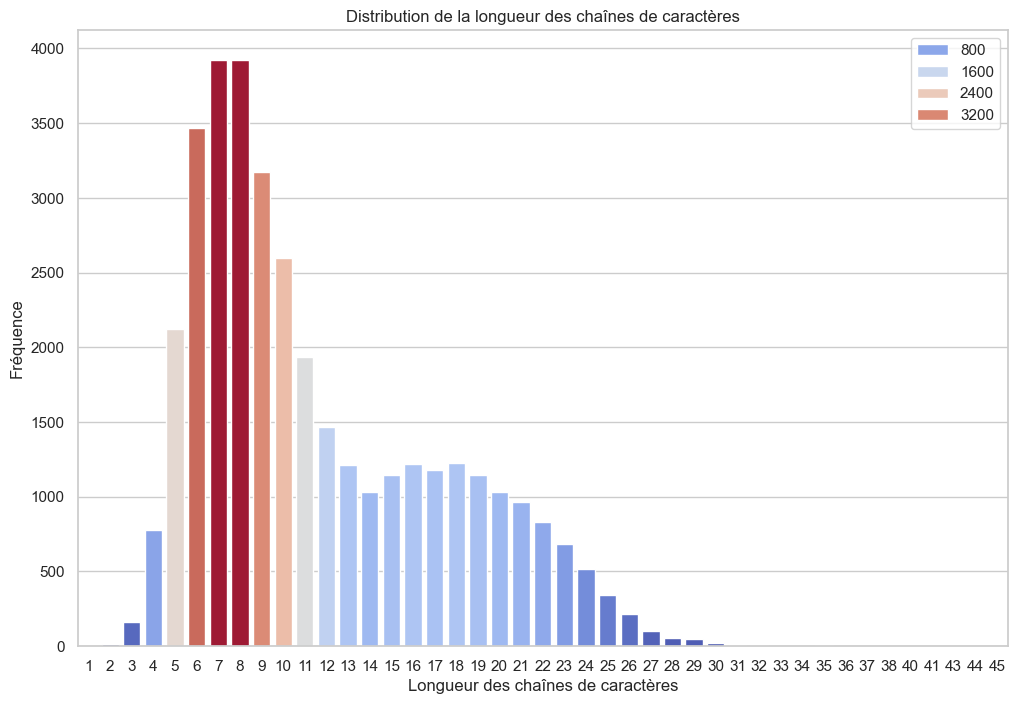

In [7]:
lengths = freq_distribution(df['nom'])

In [8]:
lengths.describe()

count    36583.00000
mean        11.68551
std          5.78169
min          1.00000
25%          7.00000
50%         10.00000
75%         16.00000
max         45.00000
Name: nom, dtype: float64

#### Fréquences des caractères dans les noms

In [9]:
freq_char(df['nom'])

Nombre de caractères distincts : 43


,Caractère,Fréquence
6,e,46107
0,a,37558
5,n,32035
10,l,30567
12,s,30264
1,r,30034
3,i,28939
17,-,26344
9,o,22464
7,u,21143


Taux de fréquence par rapport aux (dix premières) positions dans la chaîne de caractères

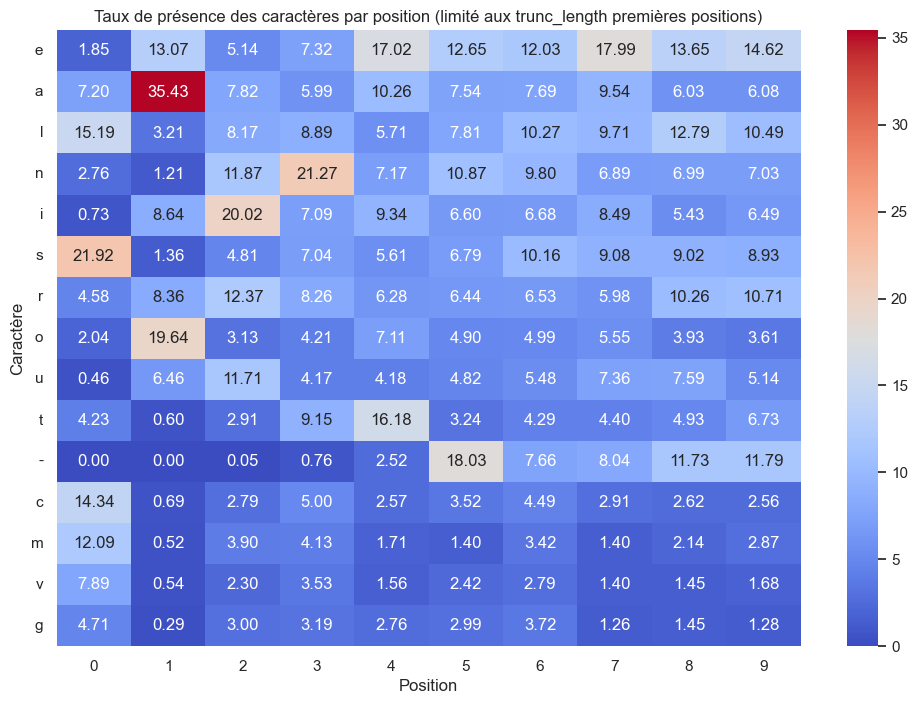

In [10]:
rate_freq_by_position(df['nom'])

#### Fréquence des composants de nom

In [11]:
freq_composition_element(df['nom'])

Nombre total de composants distincts : 28449


,Élément,Fréquence
1472,fontaine,80
10816,baume,9
5994,yrieix,6
4478,coulombs,4
27382,forcelles,2
7219,orchies,2
26324,maizilly,1
13226,léalvillers,1
22352,ascros,1
16629,morbier,1


Nombre total de composants présents plus d'une fois : 5807


,Élément,Fréquence
37,saint,4409
50,sur,2080
23,la,1868
30,le,1698
9,de,1229
101,en,971
96,lès,553
54,d,484
116,les,475
33,sainte,397


Combien de noms de communes sont composées ?
Quelle est la distribution du nombre de composants ?

,count
nom,
1,21505
2,4776
3,6810
4,3243
5,210
6,33
7,5
8,1


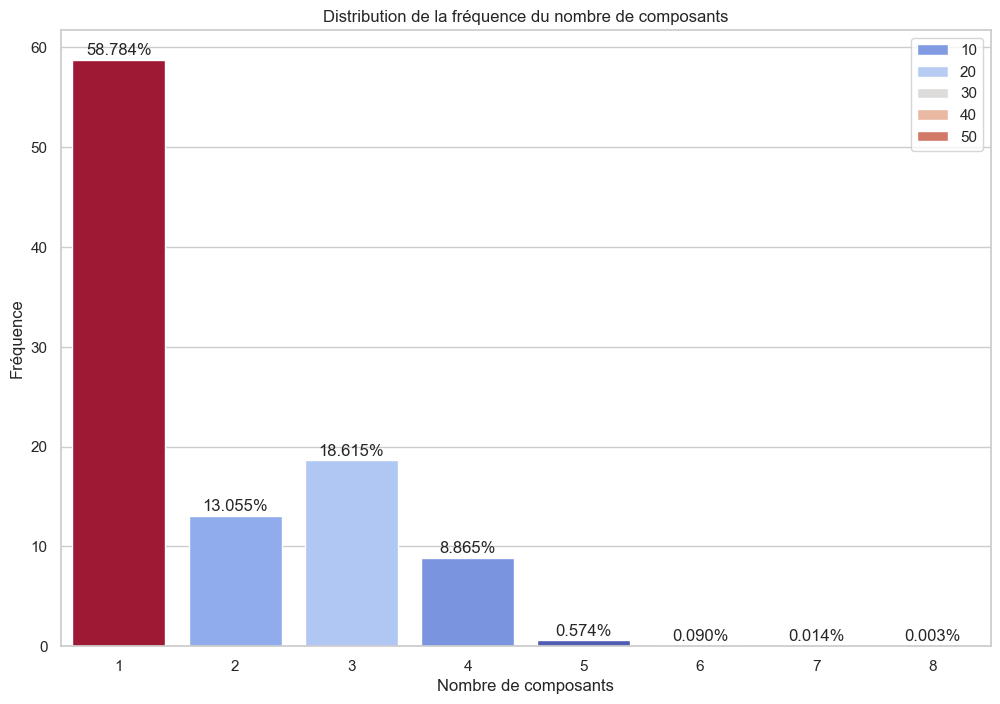

In [12]:
composition_distribution(df['nom'])

## Dataset et Dataloader

Test du dataset

In [13]:
dataset = CityNameDataset(device="cpu") # toute la partie données de 2_mlp.py a été encapsulée dans l'objet Dataset

creating vocabulary:   0%|          | 0/46 [00:00<?, ?it/s]

creatind dataset:   0%|          | 0/36585 [00:00<?, ?it/s]

In [14]:
x, Y = batch = dataset.get_batch(batch_size=2)
print("> X (ids):", x.to("cpu"), sep="\n")
print("> caractères correspondants pour la première séquence :", dataset.cast_int_to_char(x[0].to("cpu").tolist()), sep="\n")
print("> nom :", dataset.to_string(x.to("cpu")[0].tolist()))

> X (ids):
tensor([[ 1, 27, 14, 17, 17, 10, 23, 24,  5, 17, 35, 24,  5, 17, 26, 29, 10, 26,
         14, 17,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  7, 20, 26, 12, 20, 19,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
> caractères correspondants pour la première séquence :
['<SOS>', 'v', 'i', 'l', 'l', 'e', 'r', 's', '-', 'l', 'è', 's', '-', 'l', 'u', 'x', 'e', 'u', 'i', 'l', '<EOS>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
> nom : villers-lès-luxeuil
